In [1]:
import warnings

warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PowerTransformer
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    precision_score,
    recall_score,
    mean_squared_error,
    auc,
    roc_curve,
    roc_auc_score,
    confusion_matrix,
    classification_report,
)

# Get Data


In [3]:
# ! pip install yfinance

In [4]:
import yfinance as yf

xmr = yf.Ticker("XMR-USD")
df_xmr = yf.download(tickers="XMR-USD", period="max", interval="1d")

# xmr = yf.Ticker("BTC-USD")
# df_xmr = yf.download(tickers="BTC-USD", period="max", interval="1d")

[*********************100%%**********************]  1 of 1 completed


In [5]:
df_xmr

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-11-09,112.531998,123.404999,112.219002,120.779999,120.779999,86864600
2017-11-10,121.344002,121.665001,101.757004,105.585999,105.585999,84614000
2017-11-11,105.750000,127.106003,103.877998,119.615997,119.615997,107708000
2017-11-12,119.597000,133.675003,110.617996,123.856003,123.856003,144948000
2017-11-13,128.960007,136.528000,120.921997,123.402000,123.402000,116200000
...,...,...,...,...,...,...
2023-10-14,153.583801,154.282990,151.850967,152.833160,152.833160,33344438
2023-10-15,152.833466,153.465881,152.173126,152.448990,152.448990,31895675
2023-10-16,152.437531,153.522949,151.155411,152.544098,152.544098,64382308


In [6]:
df_xmr.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2170.000000,2170.000000,2170.000000,2170.000000,2170.000000,2.170000e+03
mean,150.046511,155.404895,144.217264,150.030696,150.030696,2.427891e+08
std,81.476661,85.941782,76.394347,81.421976,81.421976,9.977938e+08
min,33.084614,36.645374,26.703888,33.010323,33.010323,1.016030e+07
25%,83.937435,87.292955,80.620262,83.923874,83.923874,6.354276e+07
50%,144.278290,147.416046,141.305954,144.346733,144.346733,1.010985e+08
75%,190.517448,199.267601,183.082325,190.412144,190.412144,1.889724e+08
max,483.709991,517.620239,453.390991,483.583618,483.583618,2.895912e+10


# Make Label


In [7]:
df_xmr["Close_difference"] = df_xmr["Close"].shift(-1) - df_xmr["Close"]
df = df_xmr.copy()

##### method1


In [8]:
df["Label"] = (df["Close_difference"] > 0).astype(int)
df.drop("Close_difference", axis=1, inplace=True)
df

,Open,High,Low,Close,Adj Close,Volume,Label
Date,,,,,,,
2017-11-09,112.531998,123.404999,112.219002,120.779999,120.779999,86864600,0
2017-11-10,121.344002,121.665001,101.757004,105.585999,105.585999,84614000,1
2017-11-11,105.750000,127.106003,103.877998,119.615997,119.615997,107708000,1
2017-11-12,119.597000,133.675003,110.617996,123.856003,123.856003,144948000,0
2017-11-13,128.960007,136.528000,120.921997,123.402000,123.402000,116200000,0
...,...,...,...,...,...,...,...
2023-10-14,153.583801,154.282990,151.850967,152.833160,152.833160,33344438,0
2023-10-15,152.833466,153.465881,152.173126,152.448990,152.448990,31895675,1
2023-10-16,152.437531,153.522949,151.155411,152.544098,152.544098,64382308,0


##### method2


In [9]:
# def make_target(row):
#     diff = row["Close_difference"]
#     n = 1
#     if diff >= n:
#         return 1
#     if diff <= -n:
#         return -1
#     return 0


# df["Label"] = df.apply(make_target, axis=1)
# df.drop("Close_difference", axis=1, inplace=True)
# df

In [10]:
df = df.reset_index(drop=False)
df

,Date,Open,High,Low,Close,Adj Close,Volume,Label
0,2017-11-09,112.531998,123.404999,112.219002,120.779999,120.779999,86864600,0
1,2017-11-10,121.344002,121.665001,101.757004,105.585999,105.585999,84614000,1
2,2017-11-11,105.750000,127.106003,103.877998,119.615997,119.615997,107708000,1
3,2017-11-12,119.597000,133.675003,110.617996,123.856003,123.856003,144948000,0
4,2017-11-13,128.960007,136.528000,120.921997,123.402000,123.402000,116200000,0
...,...,...,...,...,...,...,...,...
2165,2023-10-14,153.583801,154.282990,151.850967,152.833160,152.833160,33344438,0
2166,2023-10-15,152.833466,153.465881,152.173126,152.448990,152.448990,31895675,1
2167,2023-10-16,152.437531,153.522949,151.155411,152.544098,152.544098,64382308,0
2168,2023-10-17,152.532791,152.532791,149.571411,150.522949,150.522949,59794609,1


# Change Features


In [11]:
df["Variance"] = df["High"] - df["Low"]
df

,Date,Open,High,Low,Close,Adj Close,Volume,Label,Variance
0,2017-11-09,112.531998,123.404999,112.219002,120.779999,120.779999,86864600,0,11.185997
1,2017-11-10,121.344002,121.665001,101.757004,105.585999,105.585999,84614000,1,19.907997
2,2017-11-11,105.750000,127.106003,103.877998,119.615997,119.615997,107708000,1,23.228004
3,2017-11-12,119.597000,133.675003,110.617996,123.856003,123.856003,144948000,0,23.057007
4,2017-11-13,128.960007,136.528000,120.921997,123.402000,123.402000,116200000,0,15.606003
...,...,...,...,...,...,...,...,...,...
2165,2023-10-14,153.583801,154.282990,151.850967,152.833160,152.833160,33344438,0,2.432022
2166,2023-10-15,152.833466,153.465881,152.173126,152.448990,152.448990,31895675,1,1.292755
2167,2023-10-16,152.437531,153.522949,151.155411,152.544098,152.544098,64382308,0,2.367538
2168,2023-10-17,152.532791,152.532791,149.571411,150.522949,150.522949,59794609,1,2.961380


In [12]:
df.drop(columns=["Open", "High", "Low", "Adj Close"], inplace=True)
df

,Date,Close,Volume,Label,Variance
0,2017-11-09,120.779999,86864600,0,11.185997
1,2017-11-10,105.585999,84614000,1,19.907997
2,2017-11-11,119.615997,107708000,1,23.228004
3,2017-11-12,123.856003,144948000,0,23.057007
4,2017-11-13,123.402000,116200000,0,15.606003
...,...,...,...,...,...
2165,2023-10-14,152.833160,33344438,0,2.432022
2166,2023-10-15,152.448990,31895675,1,1.292755
2167,2023-10-16,152.544098,64382308,0,2.367538
2168,2023-10-17,150.522949,59794609,1,2.961380


# Fetching Data on a Specific Date


In [13]:
start_date_train_test = "2017-11-09"
end_date_train_test = "2023-10-07"

df_train_test = df[
    (df["Date"] >= start_date_train_test) & (df["Date"] <= end_date_train_test)
].reset_index(drop=True)
df_train_test

,Date,Close,Volume,Label,Variance
0,2017-11-09,120.779999,86864600,0,11.185997
1,2017-11-10,105.585999,84614000,1,19.907997
2,2017-11-11,119.615997,107708000,1,23.228004
3,2017-11-12,123.856003,144948000,0,23.057007
4,2017-11-13,123.402000,116200000,0,15.606003
...,...,...,...,...,...
2154,2023-10-03,147.151352,49389643,1,2.639694
2155,2023-10-04,150.469055,59400400,0,4.761566
2156,2023-10-05,149.623718,55704972,1,2.762878
2157,2023-10-06,151.992264,49535004,1,4.027649


# Split Data into Train and Test


In [14]:
def train_test_split_by_date(
    df: pd.DataFrame,
    start_date_train: str,
    end_date_train: str,
    start_date_test: str,
    end_date_test: str,
    divide_X_y: bool = True,
    test: bool = True,
):
    df_train = df[
        (df["Date"] >= start_date_train) & (df["Date"] <= end_date_train)
    ].reset_index(drop=True)

    df_test = df[
        (df["Date"] >= start_date_test) & (df["Date"] <= end_date_test)
    ].reset_index(drop=True)

    if divide_X_y:
        X_train = df_train.drop(columns=["Label"])
        y_train = df_train["Label"]
        if test:
            X_test = df_test.drop(columns=["Label"])
            y_test = df_test["Label"]
            return X_train, X_test, y_train, y_test
        return X_train, y_train

    return df_train, df_test

In [15]:
start_date_train_val = "2017-11-09"
end_date_train_val = "2023-09-07"

start_date_test = "2023-09-08"
end_date_test = "2023-10-07"

df_train_val, df_test = train_test_split_by_date(
    df,
    start_date_train_val,
    end_date_train_val,
    start_date_test,
    end_date_test,
    divide_X_y=False,
)
df_test

,Date,Close,Volume,Label,Variance
0,2023-09-08,143.886154,46927009,0,3.195389
1,2023-09-09,143.406815,35896666,0,1.677582
2,2023-09-10,142.894440,33705148,0,1.965088
3,2023-09-11,139.930466,58031716,1,5.441772
4,2023-09-12,140.804672,57433672,1,3.567017
5,2023-09-13,143.115967,54374646,1,4.085739
6,2023-09-14,146.329483,44084896,1,4.750565
7,2023-09-15,147.350723,57280169,0,2.792572
8,2023-09-16,144.624649,34872985,1,3.754654
9,2023-09-17,145.797852,31255846,0,2.700851


# Plots


### Stock Chart Plot


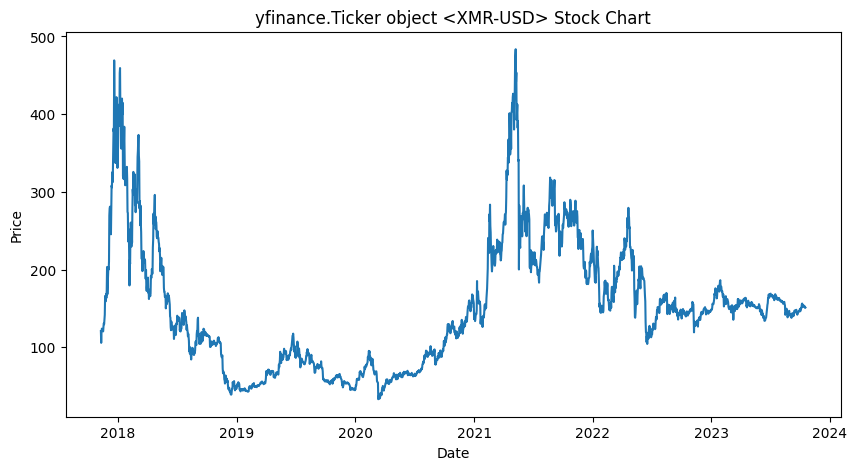

In [16]:
plt.figure(figsize=(10, 5))
plt.plot(df_xmr["Close"])
plt.title(f"{xmr} Stock Chart")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()

In [17]:
df_xmr

,Open,High,Low,Close,Adj Close,Volume,Close_difference
Date,,,,,,,
2017-11-09,112.531998,123.404999,112.219002,120.779999,120.779999,86864600,-15.194000
2017-11-10,121.344002,121.665001,101.757004,105.585999,105.585999,84614000,14.029999
2017-11-11,105.750000,127.106003,103.877998,119.615997,119.615997,107708000,4.240005
2017-11-12,119.597000,133.675003,110.617996,123.856003,123.856003,144948000,-0.454002
2017-11-13,128.960007,136.528000,120.921997,123.402000,123.402000,116200000,-1.049004
...,...,...,...,...,...,...,...
2023-10-14,153.583801,154.282990,151.850967,152.833160,152.833160,33344438,-0.384171
2023-10-15,152.833466,153.465881,152.173126,152.448990,152.448990,31895675,0.095108
2023-10-16,152.437531,153.522949,151.155411,152.544098,152.544098,64382308,-2.021149


### candlestick


In [18]:
# ! pip install mplfinance

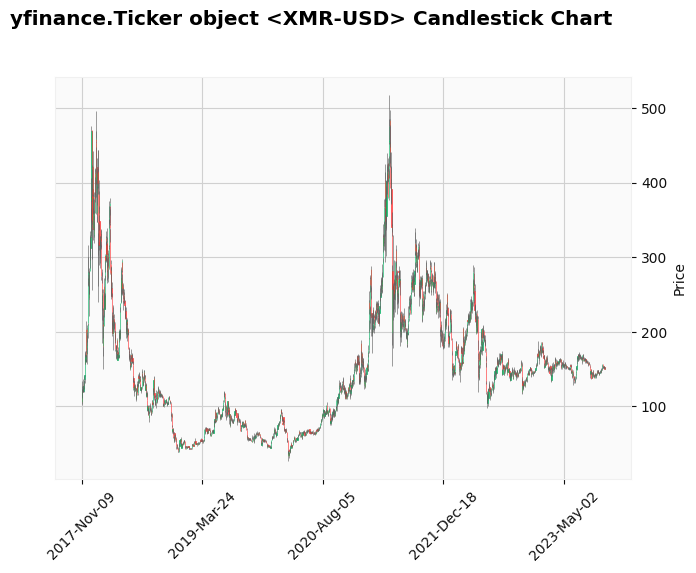

In [19]:
import mplfinance as mpf

mpf.plot(
    df_xmr.loc[:, :], type="candle", style="yahoo", title=f"{xmr} Candlestick Chart"
)

# Feature Engineering


### Check Missing Values


In [20]:
df_train_val.isna().sum()

Date        0
Close       0
Volume      0
Label       0
Variance    0
dtype: int64

### Outlier


##### drop ountliers, Z-Score method


In [21]:
def drop_outliers_zScore(data, threshold=3):
    z_scores = (data.iloc[:, :-1] - data.iloc[:, :-1].mean()) / data.iloc[:, :-1].std()
    print((np.abs(z_scores) < threshold).all(axis=1).sum())
    filtered_data = data[(np.abs(z_scores) < threshold).all(axis=1)]
    return filtered_data

In [22]:
df_train_val_no_outliers_zScore = drop_outliers_zScore(df_train_val)
df_train_test_no_outliers_zScore = drop_outliers_zScore(df_train_test)
df_train_val_no_outliers_zScore

2095
2125


,Date,Close,Volume,Label,Variance
0,2017-11-09,120.779999,86864600,0,11.185997
1,2017-11-10,105.585999,84614000,1,19.907997
2,2017-11-11,119.615997,107708000,1,23.228004
3,2017-11-12,123.856003,144948000,0,23.057007
4,2017-11-13,123.402000,116200000,0,15.606003
...,...,...,...,...,...
2124,2023-09-03,140.839981,49564266,1,2.094498
2125,2023-09-04,141.170868,63835398,0,2.993912
2126,2023-09-05,137.781372,54468002,1,3.625900
2127,2023-09-06,142.113235,67734044,1,5.009445


##### drop outliers with LocalOutlierFactor


In [23]:
from sklearn.neighbors import LocalOutlierFactor


def drop_outliers_LOF(df: pd.DataFrame):
    data = df.copy().drop("Date", axis=1)
    clf = LocalOutlierFactor(n_neighbors=10, contamination=0.03)  # 0.03, 0.05

    # Fit the data to the model
    y_pred = clf.fit_predict(data.copy().iloc[:, :-1])

    # Identify the outliers
    outliers = np.where(y_pred == -1)

    return df.drop(outliers[0])

In [24]:
# df_train_val.reset_index(drop=False)

In [25]:
df_train_val_no_outliers_lof = drop_outliers_LOF(df_train_val)
df_train_test_no_outliers_lof = drop_outliers_LOF(df_train_test)
df_train_val_no_outliers_lof

,Date,Close,Volume,Label,Variance
0,2017-11-09,120.779999,86864600,0,11.185997
1,2017-11-10,105.585999,84614000,1,19.907997
2,2017-11-11,119.615997,107708000,1,23.228004
3,2017-11-12,123.856003,144948000,0,23.057007
4,2017-11-13,123.402000,116200000,0,15.606003
...,...,...,...,...,...
2124,2023-09-03,140.839981,49564266,1,2.094498
2125,2023-09-04,141.170868,63835398,0,2.993912
2126,2023-09-05,137.781372,54468002,1,3.625900
2127,2023-09-06,142.113235,67734044,1,5.009445


##### choose one filtered dataframe


##### چون داده هامون سری زمانی هستن داده پرت پیدا کردن معنی نداره فکرکنم


### Split Data into Train and Validation


In [97]:
start_date_train = "2017-11-09"
end_date_train = "2023-06-07"

start_date_val = "2023-06-08"
end_date_val = "2023-09-07"

X_train, X_validation, y_train, y_validation = train_test_split_by_date(
    df_train_val,
    start_date_train,
    end_date_train,
    start_date_val,
    end_date_val,
    divide_X_y=True,
)

In [27]:
X_train.head()

,Date,Close,Volume,Variance
0,2017-11-09,120.779999,86864600,11.185997
1,2017-11-10,105.585999,84614000,19.907997
2,2017-11-11,119.615997,107708000,23.228004
3,2017-11-12,123.856003,144948000,23.057007
4,2017-11-13,123.402000,116200000,15.606003


In [28]:
X_validation.head()

,Date,Close,Volume,Variance
0,2023-08-08,158.887863,85841743,2.302139
1,2023-08-09,157.203140,78453875,2.884705
2,2023-08-10,155.993378,97252803,3.046890
3,2023-08-11,156.793015,81873242,2.020401
4,2023-08-12,157.723282,75281080,1.464630


In [29]:
X_train.describe()

,Date,Close,Volume,Variance
count,2098,2098.000000,2.098000e+03,2098.000000
mean,2020-09-22 12:00:00,150.118261,2.490891e+08,11.451761
min,2017-11-09 00:00:00,33.010323,1.016030e+07,0.610867
25%,2019-04-17 06:00:00,81.971788,6.545999e+07,3.545638
50%,2020-09-22 12:00:00,143.457558,1.045898e+08,7.036434
75%,2022-02-28 18:00:00,196.357681,1.930206e+08,13.446255
max,2023-08-07 00:00:00,483.583618,2.895912e+10,191.717880
std,NaN,82.800364,1.014184e+09,14.403339


### Plot Distributions


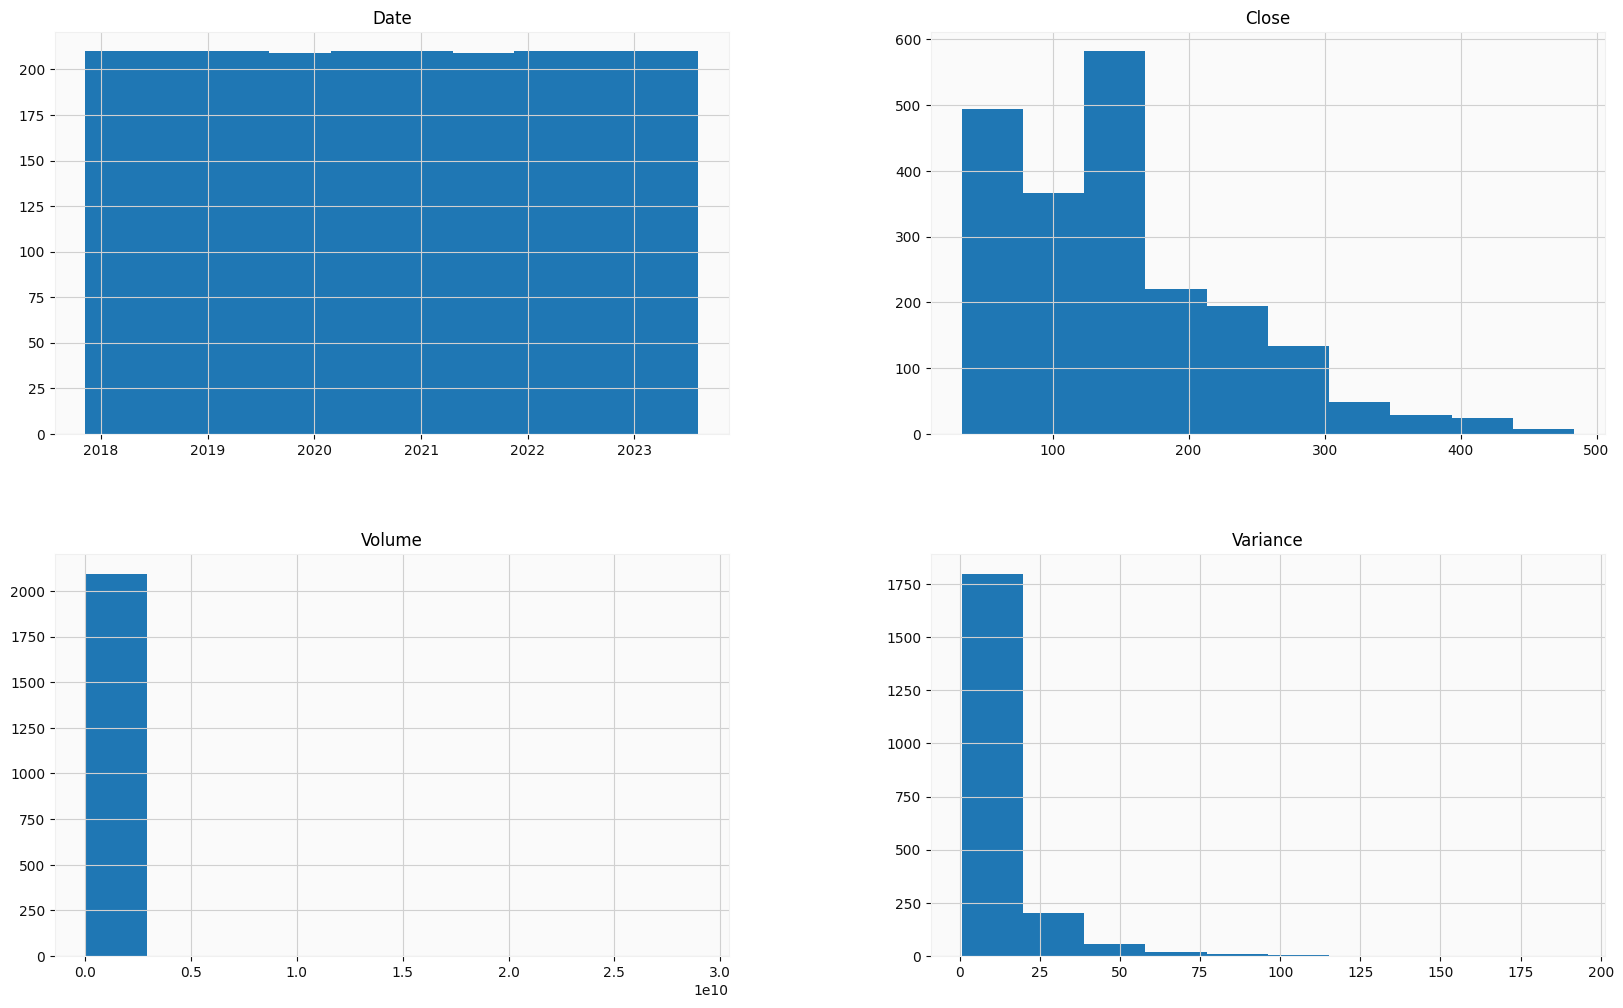

In [30]:
X_train.hist(figsize=[20, 12])
plt.show()

### Normalizing


##### method 1 : Standard Scaler


In [31]:
X_train_normalized_ss = X_train.copy()
X_validation_normalized_ss = X_validation.copy()

scaler_ss = StandardScaler()
cols = X_train.drop(columns=["Date"]).columns
X_train_normalized_ss[cols] = scaler_ss.fit_transform(X_train_normalized_ss[cols])
X_validation_normalized_ss[cols] = scaler_ss.transform(X_validation_normalized_ss[cols])

In [32]:
X_train_normalized_ss.describe()

,Date,Close,Volume,Variance
count,2098,2.098000e+03,2098.000000,2.098000e+03
mean,2020-09-22 12:00:00,-2.709410e-17,0.000000,4.741467e-17
min,2017-11-09 00:00:00,-1.414678e+00,-0.235643,-7.528448e-01
25%,2019-04-17 06:00:00,-8.232176e-01,-0.181104,-5.490399e-01
50%,2020-09-22 12:00:00,-8.046210e-02,-0.142512,-3.066219e-01
75%,2022-02-28 18:00:00,5.585778e-01,-0.055297,1.385074e-01
max,2023-08-07 00:00:00,4.028302e+00,28.315257,1.251856e+01
std,NaN,1.000238e+00,1.000238,1.000238e+00


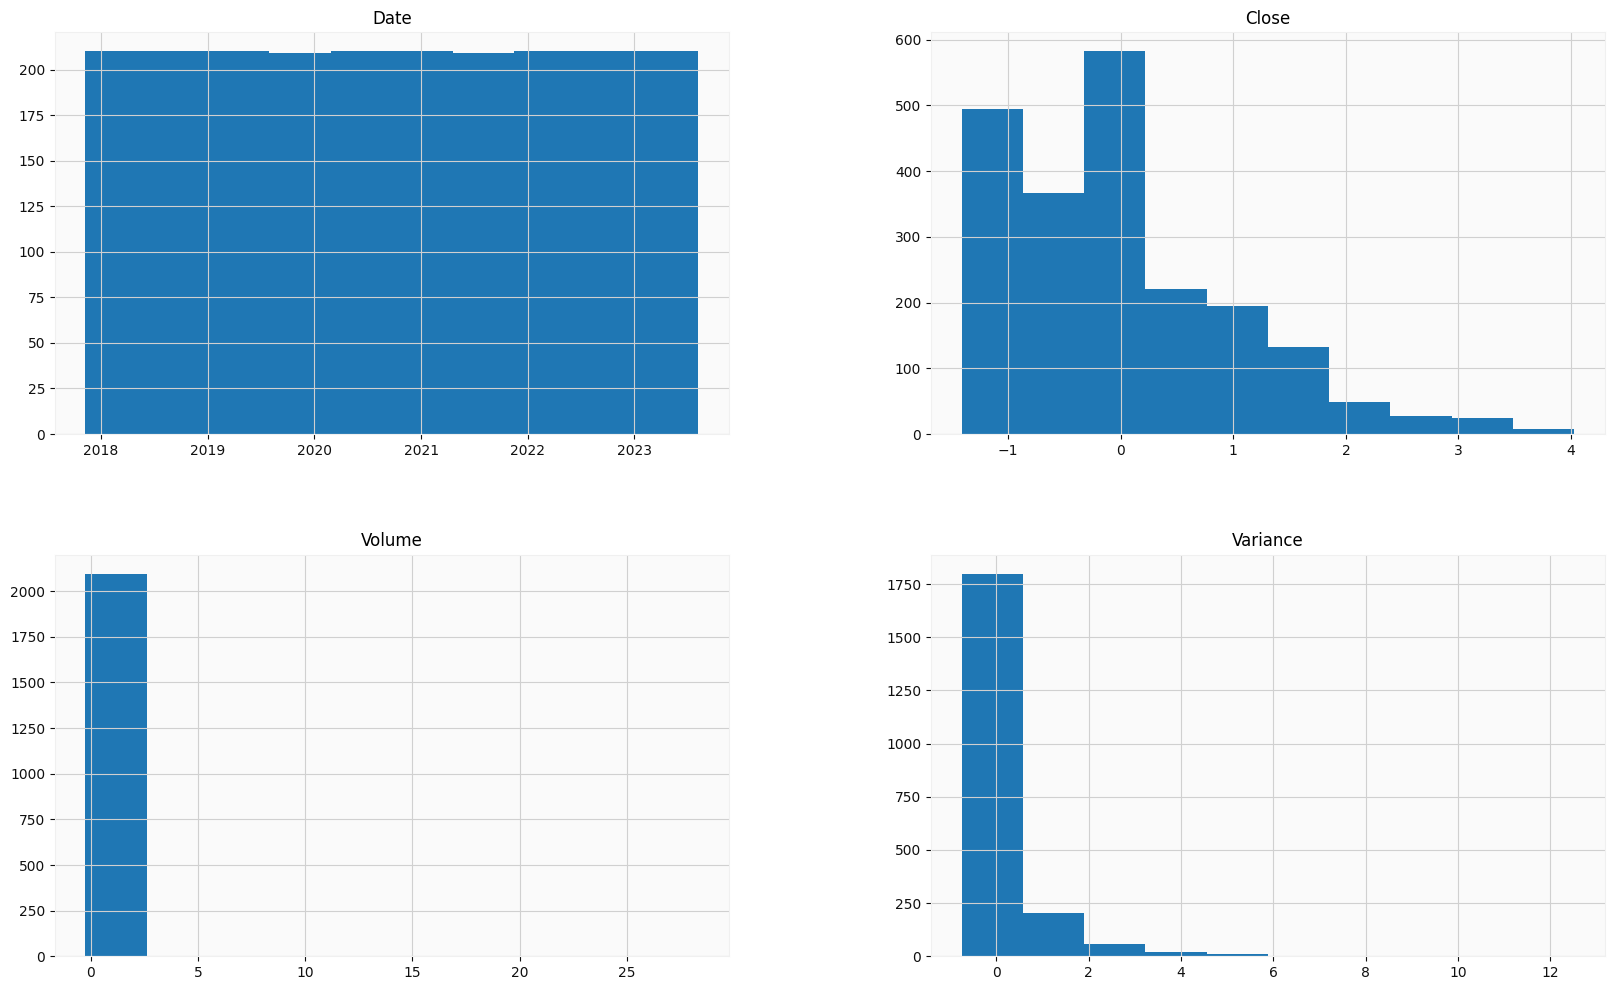

In [33]:
X_train_normalized_ss.hist(figsize=[20, 12])
plt.show()

##### method 2 : Power Transform


In [34]:
X_train_transformed = X_train.copy()
X_validation_transformed = X_validation.copy()

power_transformer = PowerTransformer(method="yeo-johnson", standardize=True)

cols = X_train.drop(columns=["Date"]).columns

X_train_transformed[cols] = power_transformer.fit_transform(X_train_transformed[cols])
X_validation_transformed[cols] = power_transformer.transform(
    X_validation_transformed[cols]
)

In [35]:
X_train_transformed.describe()

,Date,Close,Volume,Variance
count,2098,2.098000e+03,2.098000e+03,2.098000e+03
mean,2020-09-22 12:00:00,1.083764e-16,-9.320370e-15,-4.335056e-16
min,2017-11-09 00:00:00,-2.221810e+00,-2.869403e+00,-2.519427e+00
25%,2019-04-17 06:00:00,-8.107004e-01,-5.249464e-01,-7.655246e-01
50%,2020-09-22 12:00:00,1.538186e-01,-3.696628e-02,1.995747e-02
75%,2022-02-28 18:00:00,7.283273e-01,5.484932e-01,7.189766e-01
max,2023-08-07 00:00:00,2.520115e+00,3.686680e+00,2.824635e+00
std,NaN,1.000238e+00,1.000238e+00,1.000238e+00


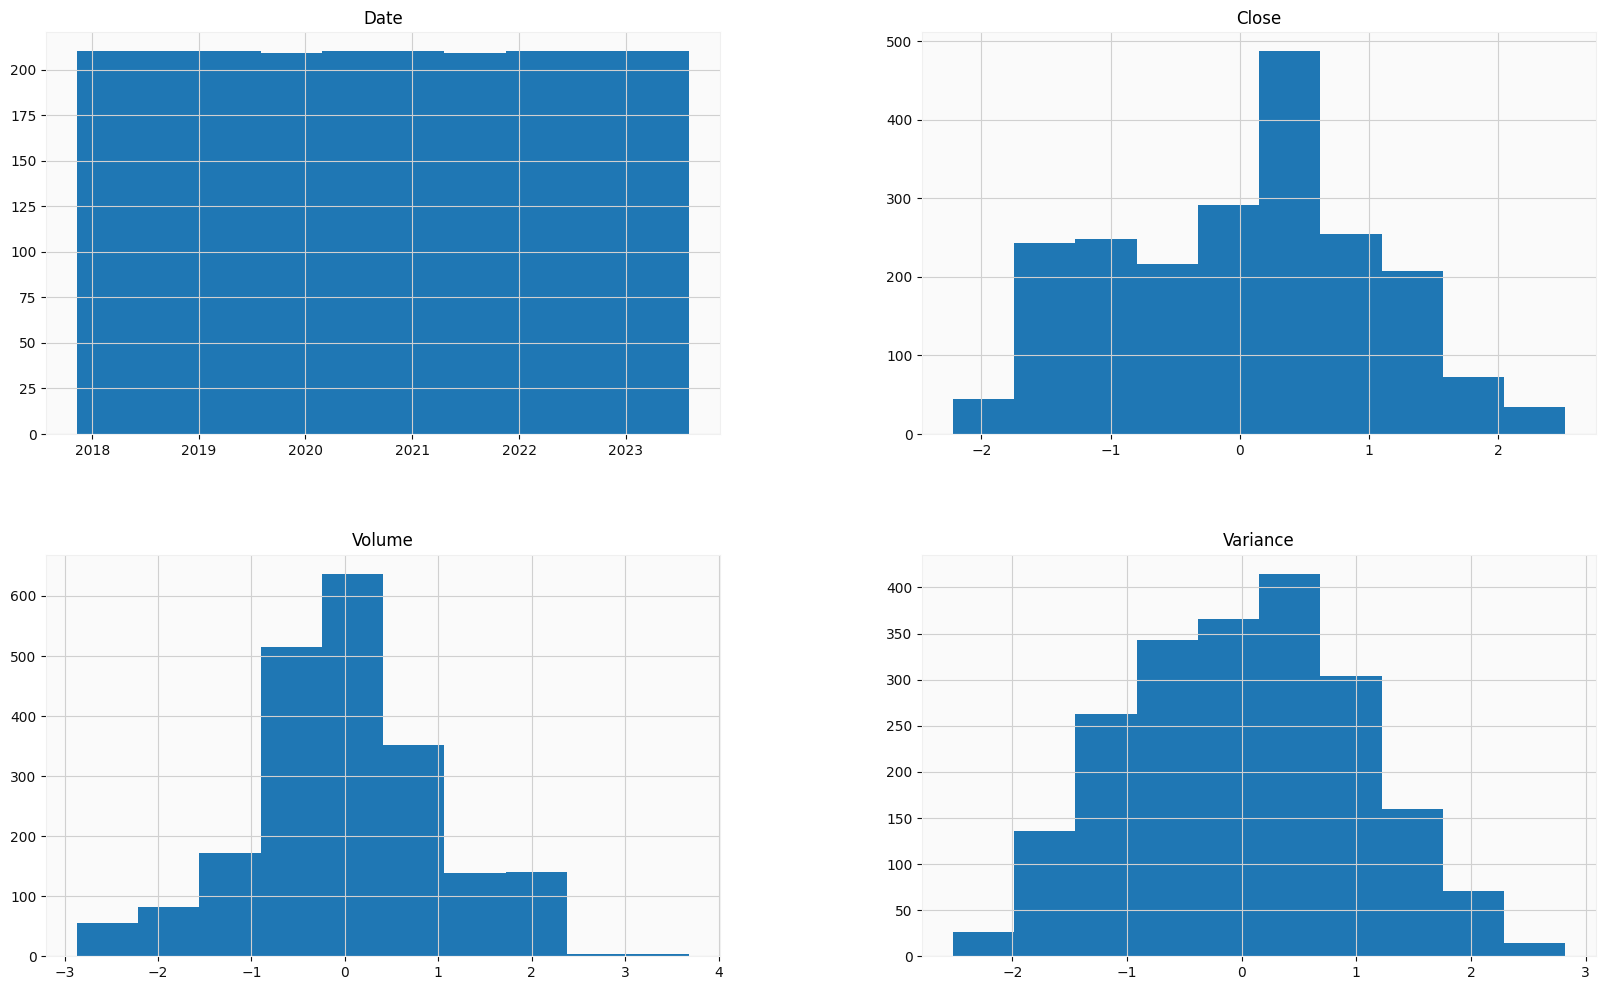

In [36]:
X_train_transformed.hist(figsize=[20, 12])
plt.show()

##### method 3 : Min Max Scaler


In [37]:
X_train_normalized_ms = X_train.copy()
X_validation_normalized_ms = X_validation.copy()

scaler_min_max = StandardScaler()
cols = X_train.drop(columns=["Date"]).columns
X_train_normalized_ms[cols] = scaler_min_max.fit_transform(X_train_normalized_ms[cols])
X_validation_normalized_ms[cols] = scaler_min_max.transform(
    X_validation_normalized_ms[cols]
)

In [38]:
X_train_normalized_ms.describe()

,Date,Close,Volume,Variance
count,2098,2.098000e+03,2098.000000,2.098000e+03
mean,2020-09-22 12:00:00,-2.709410e-17,0.000000,4.741467e-17
min,2017-11-09 00:00:00,-1.414678e+00,-0.235643,-7.528448e-01
25%,2019-04-17 06:00:00,-8.232176e-01,-0.181104,-5.490399e-01
50%,2020-09-22 12:00:00,-8.046210e-02,-0.142512,-3.066219e-01
75%,2022-02-28 18:00:00,5.585778e-01,-0.055297,1.385074e-01
max,2023-08-07 00:00:00,4.028302e+00,28.315257,1.251856e+01
std,NaN,1.000238e+00,1.000238,1.000238e+00


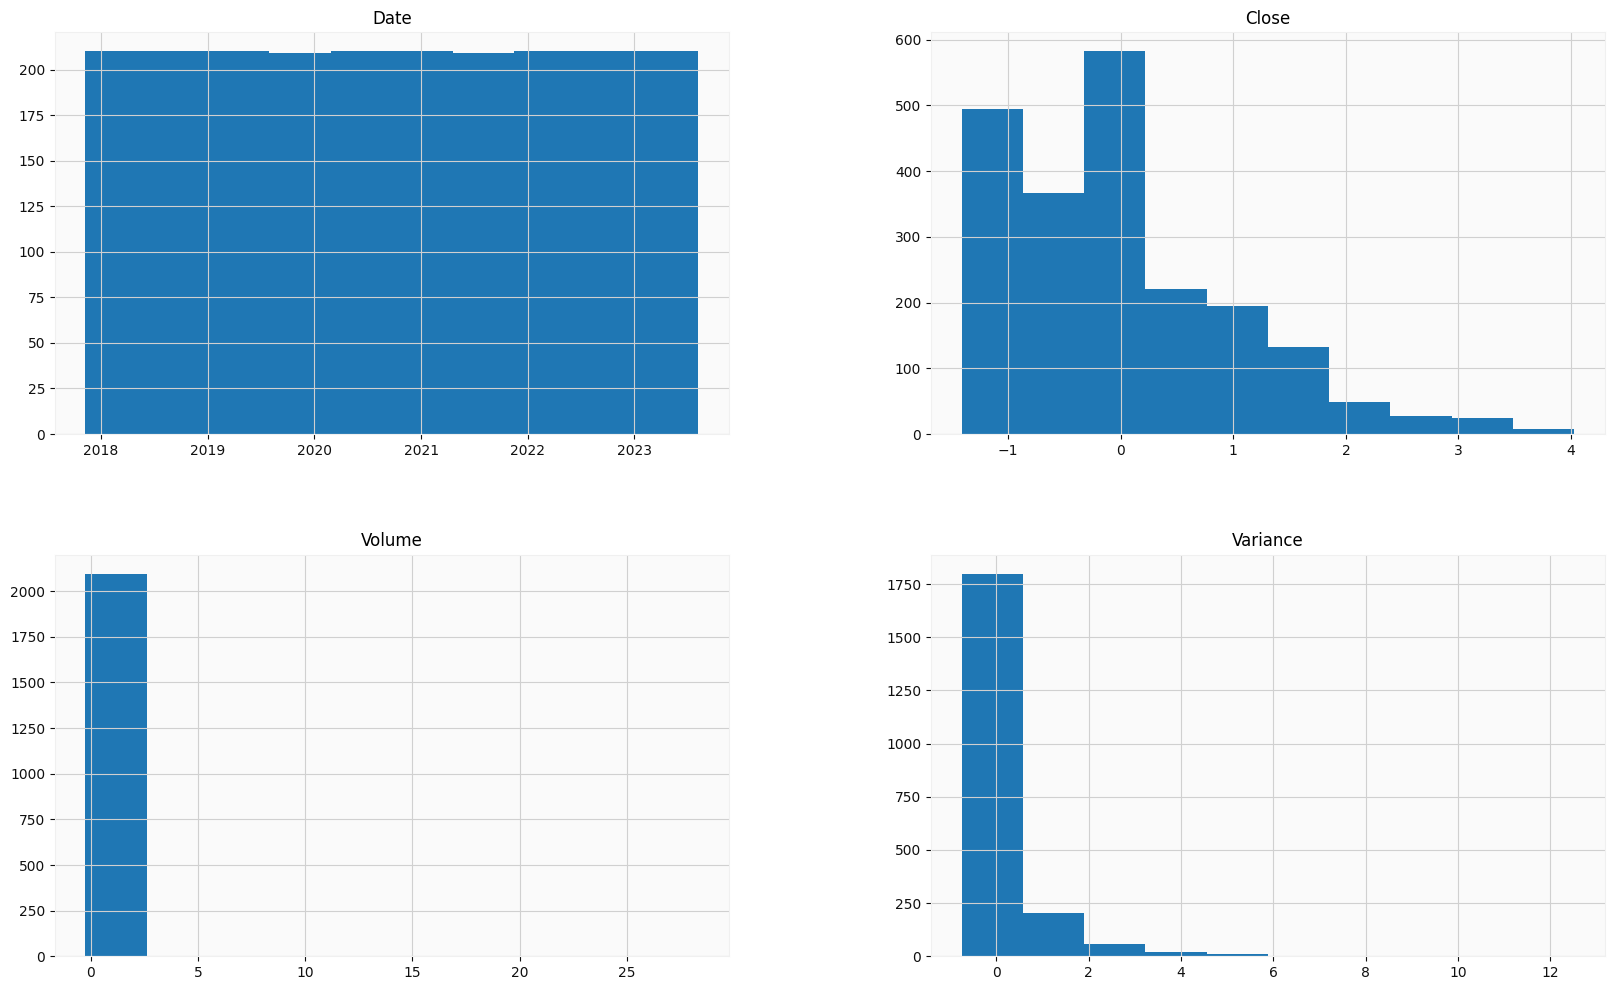

In [39]:
X_train_normalized_ms.hist(figsize=[20, 12])
plt.show()

In [40]:
df_train_val.corr()

,Date,Close,Volume,Label,Variance
Date,1.000000,0.163580,0.029405,0.040528,-0.133914
Close,0.163580,1.000000,0.049219,-0.015416,0.671699
Volume,0.029405,0.049219,1.000000,0.012916,0.083045
Label,0.040528,-0.015416,0.012916,1.000000,-0.008214
Variance,-0.133914,0.671699,0.083045,-0.008214,1.000000


# Train


### Create Functions


##### Normalization Function


In [41]:
def normalization(X_train, X_test, method):
    X_train_normalized = X_train.copy()
    X_test_normalized = X_test.copy()

    if method == "StandardScaler":
        ss = StandardScaler()
        X_train_normalized[X_train.columns] = ss.fit_transform(X_train[X_train.columns])
        X_test_normalized[X_test.columns] = ss.transform(X_test[X_test.columns])

    if method == "MinMaxScaler":
        ms = MinMaxScaler()
        X_train_normalized[X_train.columns] = ms.fit_transform(X_train[X_train.columns])
        X_test_normalized[X_test.columns] = ms.transform(X_test[X_test.columns])

    if method == "PowerTransformer":
        pt = PowerTransformer()
        X_train_normalized[X_train.columns] = pt.fit_transform(X_train[X_train.columns])
        X_test_normalized[X_test.columns] = pt.transform(X_test[X_test.columns])

    return X_train_normalized, X_test_normalized

##### Evaluation Function


In [42]:
def evaluation(y_true, y_pred, df_evaluation, df_confusion, model_name):
    # Evaluate
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    auc_score = roc_auc_score(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    confusion = confusion_matrix(y_true, y_pred)

    new_record_evaluation = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "AUC": auc_score,
        "MSE": mse,
    }

    df_evaluation.loc[model_name] = new_record_evaluation

    # Confusion matrix

    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    # tp = np.sum((y_true == 1) & (y_pred == 1))
    # tn = np.sum((y_true == 0) & (y_pred == 0))
    # fp = np.sum((y_true == 0) & (y_pred == 1))
    # fn = np.sum((y_true == 1) & (y_pred == 0))

    new_record_confusion = {
        "tp": confusion[1, 1],
        "tn": confusion[0, 0],
        "fp": confusion[0, 1],
        "fn": confusion[1, 0],
    }

    df_confusion.loc[model_name] = new_record_confusion

    print(confusion)
    print(new_record_evaluation)

    return df_evaluation, df_confusion

In [43]:
def plot_prediction(
    df,
    y_true,
    y_pred,
):
    import plotly.graph_objects as go

    data = df.copy()

    data["Predicted_Label"] = y_pred
    data["True_Label"] = y_true

    fig = go.Figure()

    for label, marker_symbol, marker_color in [
        ("True Positive", "circle", "blue"),
        ("True Negative", "x", "red"),
        ("False Positive", "x", "blue"),
        ("False Negative", "circle", "red"),
    ]:
        df_filtered = data[
            (
                data["True_Label"]
                == (label == "True Positive" or label == "False Negative")
            )
            & (
                data["Predicted_Label"]
                == (label == "True Positive" or label == "False Positive")
            )
        ]

        fig.add_trace(
            go.Scatter(
                x=df_filtered["Close"],
                y=df_filtered["Volume"],
                mode="markers",
                name=label,
                marker=dict(size=10, symbol=marker_symbol, color=marker_color),
            )
        )

    fig.update_xaxes(title_text="Close")
    fig.update_yaxes(title_text="Volume")
    fig.update_layout(title="Scatter Plot with Four Scenarios", showlegend=True)
    fig.show()

##### Model Function


In [44]:
def model_predict(
    df_train_val,
    model,
    test_item,
    normalize=False,
    start_date_train="2017-11-09",
    start_date_val="2023-08-08",
    end_date_val="2023-09-07",
):
    from datetime import date, timedelta

    test_item_date = test_item.Date.date()

    end_date_train = (test_item_date - timedelta(days=1)).strftime("%Y-%m-%d")

    X_train, y_train = train_test_split_by_date(
        df_train_val,
        start_date_train,
        end_date_train,
        start_date_val,
        end_date_val,
        divide_X_y=True,
        test=False,
    )

    X_train = X_train.drop("Date", axis=1)
    X_test = (test_item[1:].to_frame().T).astype(float)

    # Normalized
    # if normalize:
    X_train, X_test = normalization(X_train, X_test, method="PowerTransformer")

    # Train model
    model.fit(X_train, y_train)

    # Predict
    y_pred = model.predict(X_test)

    return y_pred

### Define Evaluation Matrixes


In [45]:
df_confusion_val = pd.DataFrame({}, columns=["tn", "fp", "fn", "tp"])
df_evaluation_val = pd.DataFrame(
    columns=["Accuracy", "Precision", "Recall", "F1 Score", "AUC", "MSE"]
)

### Try models


##### Logistic Regression


In [46]:
def logestic_regression(df, X_test, y_test, df_evaluation, df_confusion):
    from sklearn.linear_model import LogisticRegression

    model_lr = LogisticRegression(C=1, penalty="l2")
    model_name = "Logistic Regression"

    df_confusion.loc[model_name] = {"tp": 0, "tn": 0, "fp": 0, "fn": 0}
    df_evaluation.loc[model_name] = {
        "Accuracy": 0,
        "Precision": 0,
        "Recall": 0,
        "F1 Score": 0,
        "AUC": 0,
        "MSE": 0,
    }

    model_new = model_lr
    y_pred_list = []
    for i in range(len(X_test)):
        test_item = X_test.iloc[i]

        model = model_new

        y_val_pred = model_predict(df, model, test_item, normalize=True)
        y_pred_list.append(y_val_pred[0])

    df_evaluation, df_confusion = evaluation(
        y_test.tolist(), y_pred_list, df_evaluation, df_confusion, model_name
    )

    plot_prediction(X_test, y_test, y_pred_list)

In [120]:
logestic_regression(
    df_train_val, X_validation, y_validation, df_evaluation_val, df_confusion_val
)

[[ 0 39]
 [ 0 53]]
{'Accuracy': 0.5760869565217391, 'Precision': 0.5760869565217391, 'Recall': 1.0, 'F1 Score': 0.7310344827586206, 'AUC': 0.5, 'MSE': 0.42391304347826086}


##### Decision Tree


In [48]:
def decision_tree_classifier(
    df, X_test, y_test, df_evaluation, df_confusion, max_depth
):
    from sklearn.tree import DecisionTreeClassifier

    model_dt = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    model_name = "Decision Tree"

    df_confusion.loc[model_name] = {"tp": 0, "tn": 0, "fp": 0, "fn": 0}
    df_evaluation.loc[model_name] = {
        "Accuracy": 0,
        "Precision": 0,
        "Recall": 0,
        "F1 Score": 0,
        "AUC": 0,
        "MSE": 0,
    }

    model_new = model_dt
    y_pred_list = []
    for i in range(len(X_test)):
        test_item = X_test.iloc[i]

        model = model_new

        y_val_pred = model_predict(df, model, test_item, normalize=False)
        y_pred_list.append(y_val_pred[0])

    df_evaluation, df_confusion = evaluation(
        y_test.tolist(), y_pred_list, df_evaluation, df_confusion, model_name
    )
    plot_prediction(X_test, y_test, y_pred_list)

In [121]:
max_depth = 30
decision_tree_classifier(
    df_train_val,
    X_validation,
    y_validation,
    df_evaluation_val,
    df_confusion_val,
    max_depth,
)

[[16 23]
 [21 32]]
{'Accuracy': 0.5217391304347826, 'Precision': 0.5818181818181818, 'Recall': 0.6037735849056604, 'F1 Score': 0.5925925925925926, 'AUC': 0.5070149975810353, 'MSE': 0.4782608695652174}


##### SVM


In [50]:
def svm(df, X_test, y_test, df_evaluation, df_confusion):
    from sklearn.svm import SVC

    model_svm = SVC()
    model_name = "SVM"

    df_confusion.loc[model_name] = {"tp": 0, "tn": 0, "fp": 0, "fn": 0}
    df_evaluation.loc[model_name] = {
        "Accuracy": 0,
        "Precision": 0,
        "Recall": 0,
        "F1 Score": 0,
        "AUC": 0,
        "MSE": 0,
    }

    # change Label 0 to -1
    # df["Label"] = df["Label"].replace({0: -1})
    # y_test = y_test.replace({0: -1})

    model_new = model_svm
    y_pred_list = []
    for i in range(len(X_test)):
        test_item = X_test.iloc[i]

        model = model_new

        y_val_pred = model_predict(df, model, test_item, normalize=False)
        y_pred_list.append(y_val_pred[0])

    df_evaluation, df_confusion = evaluation(
        y_test.tolist(), y_pred_list, df_evaluation, df_confusion, model_name
    )
    plot_prediction(X_test, y_test, y_pred_list)

In [51]:
svm(
    df_train_val.copy(), X_validation, y_validation, df_evaluation_val, df_confusion_val
)

[[ 0 13]
 [ 0 18]]
{'Accuracy': 0.5806451612903226, 'Precision': 0.5806451612903226, 'Recall': 1.0, 'F1 Score': 0.7346938775510204, 'AUC': 0.5, 'MSE': 0.41935483870967744}


##### AdaBoost


In [52]:
def ada_boost(df, X_test, y_test, df_evaluation, df_confusion):
    from sklearn.ensemble import AdaBoostClassifier

    model_ada = AdaBoostClassifier(learning_rate=2.5, random_state=42)
    model_name = "Ada Boost"

    df_confusion.loc[model_name] = {"tp": 0, "tn": 0, "fp": 0, "fn": 0}
    df_evaluation.loc[model_name] = {
        "Accuracy": 0,
        "Precision": 0,
        "Recall": 0,
        "F1 Score": 0,
        "AUC": 0,
        "MSE": 0,
    }

    model_new = model_ada
    y_pred_list = []
    for i in range(len(X_test)):
        test_item = X_test.iloc[i]

        model = model_new

        y_val_pred = model_predict(df, model, test_item, normalize=False)
        y_pred_list.append(y_val_pred[0])

    df_evaluation, df_confusion = evaluation(
        y_test.tolist(), y_pred_list, df_evaluation, df_confusion, model_name
    )
    plot_prediction(X_test, y_test, y_pred_list)

In [53]:
ada_boost(df_train_val, X_validation, y_validation, df_evaluation_val, df_confusion_val)

[[ 0 13]
 [ 0 18]]
{'Accuracy': 0.5806451612903226, 'Precision': 0.5806451612903226, 'Recall': 1.0, 'F1 Score': 0.7346938775510204, 'AUC': 0.5, 'MSE': 0.41935483870967744}


##### KNN


In [54]:
def knn(
    df, X_test, y_test, df_evaluation, df_confusion, n_neighbors, metric="manhattan"
):
    from sklearn.neighbors import KNeighborsClassifier

    model_knn = KNeighborsClassifier(n_neighbors=n_neighbors, metric=metric)
    model_name = "KNN"

    df_confusion.loc[model_name] = {"tp": 0, "tn": 0, "fp": 0, "fn": 0}
    df_evaluation.loc[model_name] = {
        "Accuracy": 0,
        "Precision": 0,
        "Recall": 0,
        "F1 Score": 0,
        "AUC": 0,
        "MSE": 0,
    }

    model_new = model_knn
    y_pred_list = []
    for i in range(len(X_test)):
        test_item = X_test.iloc[i]

        model = model_new

        y_val_pred = model_predict(df, model, test_item, normalize=True)
        y_pred_list.append(y_val_pred[0])

    df_evaluation, df_confusion = evaluation(
        y_test.tolist(), y_pred_list, df_evaluation, df_confusion, model_name
    )
    plot_prediction(X_test, y_test, y_pred_list)

In [100]:
n_neighbors = 5
metric = "euclidean"
knn(
    df_train_val,
    X_validation,
    y_validation,
    df_evaluation_val,
    df_confusion_val,
    n_neighbors,
    metric,
)

[[12 27]
 [19 34]]
{'Accuracy': 0.5, 'Precision': 0.5573770491803278, 'Recall': 0.6415094339622641, 'F1 Score': 0.5964912280701753, 'AUC': 0.47460087082728586, 'MSE': 0.5}


##### Random Forest


In [56]:
def random_forest_classifier(
    df, X_test, y_test, df_evaluation, df_confusion, max_depth, n_estimators
):
    from sklearn.ensemble import RandomForestClassifier

    model_rf = RandomForestClassifier(
        max_depth=max_depth,
        random_state=42,
        n_estimators=n_estimators,
    )
    model_name = "Random Forest"

    df_confusion.loc[model_name] = {"tp": 0, "tn": 0, "fp": 0, "fn": 0}
    df_evaluation.loc[model_name] = {
        "Accuracy": 0,
        "Precision": 0,
        "Recall": 0,
        "F1 Score": 0,
        "AUC": 0,
        "MSE": 0,
    }

    model_new = model_rf
    y_pred_list = []
    for i in range(len(X_test)):
        test_item = X_test.iloc[i]

        model = model_new

        y_val_pred = model_predict(df, model, test_item, normalize=False)
        y_pred_list.append(y_val_pred[0])

    df_evaluation, df_confusion = evaluation(
        y_test.tolist(), y_pred_list, df_evaluation, df_confusion, model_name
    )
    plot_prediction(X_test, y_test, y_pred_list)

In [96]:
y_validation.value_counts()

Label
1    18
0    13
Name: count, dtype: int64

In [101]:
max_depth = 10
n_estimators = 100
random_forest_classifier(
    df_train_val,
    X_validation,
    y_validation,
    df_evaluation_val,
    df_confusion_val,
    max_depth,
    n_estimators,
)

[[ 7 32]
 [12 41]]
{'Accuracy': 0.5217391304347826, 'Precision': 0.5616438356164384, 'Recall': 0.7735849056603774, 'F1 Score': 0.6507936507936508, 'AUC': 0.47653604257377846, 'MSE': 0.4782608695652174}


In [102]:
max_depth = 13
n_estimators = 100
random_forest_classifier(
    df_train_val,
    X_validation,
    y_validation,
    df_evaluation_val,
    df_confusion_val,
    max_depth,
    n_estimators,
)

[[ 9 30]
 [14 39]]
{'Accuracy': 0.5217391304347826, 'Precision': 0.5652173913043478, 'Recall': 0.7358490566037735, 'F1 Score': 0.6393442622950819, 'AUC': 0.48330914368650213, 'MSE': 0.4782608695652174}


In [103]:
max_depth = 14
n_estimators = 100
random_forest_classifier(
    df_train_val,
    X_validation,
    y_validation,
    df_evaluation_val,
    df_confusion_val,
    max_depth,
    n_estimators,
)

[[12 27]
 [13 40]]
{'Accuracy': 0.5652173913043478, 'Precision': 0.5970149253731343, 'Recall': 0.7547169811320755, 'F1 Score': 0.6666666666666666, 'AUC': 0.5312046444121916, 'MSE': 0.43478260869565216}


In [123]:
max_depth = 16
n_estimators = 100
random_forest_classifier(
    df_train_val,
    X_validation,
    y_validation,
    df_evaluation_val,
    df_confusion_val,
    max_depth,
    n_estimators,
)

[[14 25]
 [13 40]]
{'Accuracy': 0.5869565217391305, 'Precision': 0.6153846153846154, 'Recall': 0.7547169811320755, 'F1 Score': 0.6779661016949153, 'AUC': 0.5568456700532172, 'MSE': 0.41304347826086957}


##### Gausian


In [61]:
def gaussian_nb(df, X_test, y_test, df_evaluation, df_confusion):
    from sklearn.naive_bayes import GaussianNB

    model_gnb = GaussianNB()
    model_name = "Gaussian NB"

    df_confusion.loc[model_name] = {"tp": 0, "tn": 0, "fp": 0, "fn": 0}
    df_evaluation.loc[model_name] = {
        "Accuracy": 0,
        "Precision": 0,
        "Recall": 0,
        "F1 Score": 0,
        "AUC": 0,
        "MSE": 0,
    }

    model_new = model_gnb
    y_pred_list = []
    for i in range(len(X_test)):
        test_item = X_test.iloc[i]

        model = model_new

        y_val_pred = model_predict(df, model, test_item, normalize=True)
        y_pred_list.append(y_val_pred[0])

    df_evaluation, df_confusion = evaluation(
        y_test.tolist(), y_pred_list, df_evaluation, df_confusion, model_name
    )
    plot_prediction(X_test, y_test, y_pred_list)

In [62]:
gaussian_nb(
    df_train_val, X_validation, y_validation, df_evaluation_val, df_confusion_val
)

[[ 0 13]
 [ 0 18]]
{'Accuracy': 0.5806451612903226, 'Precision': 0.5806451612903226, 'Recall': 1.0, 'F1 Score': 0.7346938775510204, 'AUC': 0.5, 'MSE': 0.41935483870967744}


##### XGboost


In [63]:
# ! pip install xgboost

In [64]:
def xg_boost(df, X_test, y_test, df_evaluation, df_confusion):
    from xgboost import XGBClassifier

    model_xgb = XGBClassifier(random_state=42)
    model_name = "Xg Boost"

    df_confusion.loc[model_name] = {"tp": 0, "tn": 0, "fp": 0, "fn": 0}
    df_evaluation.loc[model_name] = {
        "Accuracy": 0,
        "Precision": 0,
        "Recall": 0,
        "F1 Score": 0,
        "AUC": 0,
        "MSE": 0,
    }

    model_new = model_xgb
    y_pred_list = []
    for i in range(len(X_test)):
        test_item = X_test.iloc[i]

        model = model_new

        y_val_pred = model_predict(df, model, test_item, normalize=False)
        y_pred_list.append(y_val_pred[0])

    df_evaluation, df_confusion = evaluation(
        y_test.tolist(), y_pred_list, df_evaluation, df_confusion, model_name
    )
    plot_prediction(X_test, y_test, y_pred_list)

In [65]:
xg_boost(df_train_val, X_validation, y_validation, df_evaluation_val, df_confusion_val)

[[ 4  9]
 [ 8 10]]
{'Accuracy': 0.45161290322580644, 'Precision': 0.5263157894736842, 'Recall': 0.5555555555555556, 'F1 Score': 0.5405405405405405, 'AUC': 0.43162393162393164, 'MSE': 0.5483870967741935}


##### Staking Models


In [66]:
# ! pip install mlxtend

In [105]:
def stacking(df, X_test, y_test, df_evaluation, df_confusion):
    from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
    from xgboost import XGBClassifier
    from mlxtend.classifier import StackingClassifier
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.linear_model import LogisticRegression
    from sklearn.svm import SVC

    model_svm = SVC(probability=True)
    model_lr = LogisticRegression(C=1, penalty="l2")
    model_dt = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    model_rf = RandomForestClassifier(n_estimators=100, max_depth=16, random_state=42)
    model_xgb = XGBClassifier(objective="binary:logistic", random_state=42)
    model_knn = KNeighborsClassifier(n_neighbors=5, metric="minkowski")
    model_adaboost = AdaBoostClassifier(learning_rate=0.9, random_state=42)

    stacking_model = StackingClassifier(
        classifiers=[model_knn, model_rf],
        use_probas=True,
        meta_classifier=RandomForestClassifier(n_estimators=100, random_state=42),
    )

    model_name = "Stacking ()"

    df_confusion.loc[model_name] = {"tp": 0, "tn": 0, "fp": 0, "fn": 0}
    df_evaluation.loc[model_name] = {
        "Accuracy": 0,
        "Precision": 0,
        "Recall": 0,
        "F1 Score": 0,
        "AUC": 0,
        "MSE": 0,
    }

    model_new = stacking_model
    y_pred_list = []
    for i in range(len(X_test)):
        test_item = X_test.iloc[i]

        model = model_new

        y_val_pred = model_predict(df, model, test_item, normalize=False)
        y_pred_list.append(y_val_pred[0])

    df_evaluation, df_confusion = evaluation(
        y_test.tolist(), y_pred_list, df_evaluation, df_confusion, model_name
    )
    plot_prediction(X_test, y_test, y_pred_list)

In [106]:
stacking(df_train_val, X_validation, y_validation, df_evaluation_val, df_confusion_val)

[[17 22]
 [18 35]]
{'Accuracy': 0.5652173913043478, 'Precision': 0.6140350877192983, 'Recall': 0.660377358490566, 'F1 Score': 0.6363636363636364, 'AUC': 0.548137397194001, 'MSE': 0.43478260869565216}


### Evaluation


In [108]:
f1_score(y_validation, y_validation.shift(1).fillna(0))

0.5333333333333333

In [107]:
f1_score(y_validation, y_validation.shift(1).fillna(1))

0.5471698113207547

In [109]:
df_evaluation_val

,Accuracy,Precision,Recall,F1 Score,AUC,MSE
Logistic Regression,0.580645,0.580645,1.000000,0.734694,0.500000,0.419355
Decision Tree,0.554348,0.573171,0.886792,0.696296,0.494678,0.445652
SVM,0.580645,0.580645,1.000000,0.734694,0.500000,0.419355
Ada Boost,0.580645,0.580645,1.000000,0.734694,0.500000,0.419355
KNN,0.500000,0.557377,0.641509,0.596491,0.474601,0.500000
Random Forest,0.586957,0.615385,0.754717,0.677966,0.556846,0.413043
Gaussian NB,0.580645,0.580645,1.000000,0.734694,0.500000,0.419355
Xg Boost,0.451613,0.526316,0.555556,0.540541,0.431624,0.548387
Stacking (),0.565217,0.614035,0.660377,0.636364,0.548137,0.434783


In [110]:
df_confusion_val

,tn,fp,fn,tp
Logistic Regression,0,13,0,18
Decision Tree,4,35,6,47
SVM,0,13,0,18
Ada Boost,0,13,0,18
KNN,12,27,19,34
Random Forest,14,25,13,40
Gaussian NB,0,13,0,18
Xg Boost,4,9,8,10
Stacking (),17,22,18,35


# Test


### Devide X, y


In [73]:
X_test = df_test.drop(columns=["Label"])
y_test = df_test["Label"]

### Define Ealuation Dataframes


In [74]:
df_confusion_test = pd.DataFrame({}, columns=["tn", "fp", "fn", "tp"])
df_evaluation_test = pd.DataFrame(
    columns=["Accuracy", "Precision", "Recall", "F1 Score", "AUC", "MSE"]
)

### Try Models


In [75]:
logestic_regression(
    df_train_test, X_test, y_test, df_evaluation_test, df_confusion_test
)

[[ 0 12]
 [ 0 18]]
{'Accuracy': 0.6, 'Precision': 0.6, 'Recall': 1.0, 'F1 Score': 0.7499999999999999, 'AUC': 0.5, 'MSE': 0.4}


In [76]:
max_depth = 15
decision_tree_classifier(
    df_train_test,
    X_test,
    y_test,
    df_evaluation_test,
    df_confusion_test,
    max_depth,
)

[[ 6  6]
 [ 5 13]]
{'Accuracy': 0.6333333333333333, 'Precision': 0.6842105263157895, 'Recall': 0.7222222222222222, 'F1 Score': 0.7027027027027027, 'AUC': 0.6111111111111112, 'MSE': 0.36666666666666664}


In [77]:
svm(df_train_test.copy(), X_test, y_test, df_evaluation_test, df_confusion_test)

[[ 0 12]
 [ 0 18]]
{'Accuracy': 0.6, 'Precision': 0.6, 'Recall': 1.0, 'F1 Score': 0.7499999999999999, 'AUC': 0.5, 'MSE': 0.4}


In [78]:
ada_boost(df_train_test, X_test, y_test, df_evaluation_test, df_confusion_test)

[[ 0 12]
 [ 0 18]]
{'Accuracy': 0.6, 'Precision': 0.6, 'Recall': 1.0, 'F1 Score': 0.7499999999999999, 'AUC': 0.5, 'MSE': 0.4}


In [79]:
n_neighbors = 5


metric = "minkowski"
knn(
    df_train_test,
    X_test,
    y_test,
    df_evaluation_test,
    df_confusion_test,
    n_neighbors,
    metric,
)

[[ 6  6]
 [ 5 13]]
{'Accuracy': 0.6333333333333333, 'Precision': 0.6842105263157895, 'Recall': 0.7222222222222222, 'F1 Score': 0.7027027027027027, 'AUC': 0.6111111111111112, 'MSE': 0.36666666666666664}


In [80]:
y_test.value_counts()

Label
1    18
0    12
Name: count, dtype: int64

In [81]:
max_depth = 10
n_estimators = 100
random_forest_classifier(
    df_train_test,
    X_test,
    y_test,
    df_evaluation_test,
    df_confusion_test,
    max_depth,
    n_estimators,
)

[[ 5  7]
 [ 3 15]]
{'Accuracy': 0.6666666666666666, 'Precision': 0.6818181818181818, 'Recall': 0.8333333333333334, 'F1 Score': 0.7499999999999999, 'AUC': 0.625, 'MSE': 0.3333333333333333}


In [82]:
max_depth = 13
n_estimators = 100
random_forest_classifier(
    df_train_test,
    X_test,
    y_test,
    df_evaluation_test,
    df_confusion_test,
    max_depth,
    n_estimators,
)

[[ 5  7]
 [ 4 14]]
{'Accuracy': 0.6333333333333333, 'Precision': 0.6666666666666666, 'Recall': 0.7777777777777778, 'F1 Score': 0.717948717948718, 'AUC': 0.5972222222222221, 'MSE': 0.36666666666666664}


In [83]:
max_depth = 14
n_estimators = 50
random_forest_classifier(
    df_train_test,
    X_test,
    y_test,
    df_evaluation_test,
    df_confusion_test,
    max_depth,
    n_estimators,
)

[[ 6  6]
 [ 5 13]]
{'Accuracy': 0.6333333333333333, 'Precision': 0.6842105263157895, 'Recall': 0.7222222222222222, 'F1 Score': 0.7027027027027027, 'AUC': 0.6111111111111112, 'MSE': 0.36666666666666664}


In [84]:
max_depth = 16
n_estimators = 100
random_forest_classifier(
    df_train_test,
    X_test,
    y_test,
    df_evaluation_test,
    df_confusion_test,
    max_depth,
    n_estimators,
)

[[ 6  6]
 [ 3 15]]
{'Accuracy': 0.7, 'Precision': 0.7142857142857143, 'Recall': 0.8333333333333334, 'F1 Score': 0.7692307692307692, 'AUC': 0.6666666666666667, 'MSE': 0.3}


In [85]:
gaussian_nb(df_train_test, X_test, y_test, df_evaluation_test, df_confusion_test)

[[ 0 12]
 [ 0 18]]
{'Accuracy': 0.6, 'Precision': 0.6, 'Recall': 1.0, 'F1 Score': 0.7499999999999999, 'AUC': 0.5, 'MSE': 0.4}


In [86]:
xg_boost(df_train_test, X_test, y_test, df_evaluation_test, df_confusion_test)

[[ 5  7]
 [ 8 10]]
{'Accuracy': 0.5, 'Precision': 0.5882352941176471, 'Recall': 0.5555555555555556, 'F1 Score': 0.5714285714285715, 'AUC': 0.48611111111111116, 'MSE': 0.5}


In [87]:
stacking(df_train_test, X_test, y_test, df_evaluation_test, df_confusion_test)

[[ 7  5]
 [10  8]]
{'Accuracy': 0.5, 'Precision': 0.6153846153846154, 'Recall': 0.4444444444444444, 'F1 Score': 0.5161290322580646, 'AUC': 0.5138888888888888, 'MSE': 0.5}


### Evaluation


In [88]:
df_evaluation_test

,Accuracy,Precision,Recall,F1 Score,AUC,MSE
Logistic Regression,0.600000,0.600000,1.000000,0.750000,0.500000,0.400000
Decision Tree,0.633333,0.684211,0.722222,0.702703,0.611111,0.366667
SVM,0.600000,0.600000,1.000000,0.750000,0.500000,0.400000
Ada Boost,0.600000,0.600000,1.000000,0.750000,0.500000,0.400000
KNN,0.633333,0.684211,0.722222,0.702703,0.611111,0.366667
Random Forest,0.700000,0.714286,0.833333,0.769231,0.666667,0.300000
Gaussian NB,0.600000,0.600000,1.000000,0.750000,0.500000,0.400000
Xg Boost,0.500000,0.588235,0.555556,0.571429,0.486111,0.500000
Stacking (),0.500000,0.615385,0.444444,0.516129,0.513889,0.500000


In [89]:
df_confusion_test

,tn,fp,fn,tp
Logistic Regression,0,12,0,18
Decision Tree,6,6,5,13
SVM,0,12,0,18
Ada Boost,0,12,0,18
KNN,6,6,5,13
Random Forest,6,6,3,15
Gaussian NB,0,12,0,18
Xg Boost,5,7,8,10
Stacking (),7,5,10,8


In [90]:
f1_score(y_test, y_test.shift(1).fillna(0))

0.5714285714285715